### **Home Assignment for the Programming Course**
**Maša Mlinarič**<br>
*completed on:* 10. 12. 2024<br>
*link to the Neurosynth pages of my concept (reading):* https://neurosynth.org/analyses/terms/reading/<br>
<br>
*Brief description:* This is the code for the home assignment for my Programming Course at the Vrije Universiteit Amsterdam. This code visualises brain regions that are typically associated with reading and creates a histogram to show the distribution of positive z-scores in my functional file.

*Locating the files*<br>
The code in this cell locates both files that are needed for the analysis based on their file extentions and a keyword in their title.

In [1]:
import glob
import os

# defining the current directory
source_folder=os.getcwd()

# defining file extentions
file_extention='*.nii.gz'

# defining the correct path
find_files=os.path.join(source_folder, file_extention)

# labeling both files based on the keyword in their titles
all_files=glob.glob(find_files)

for file in all_files:
    if 'anatomical' in file:
        file_anatomical=file
        
    elif 'uniformity' in file:    
        file_functional=file

*The first part of the assignment:* creating a brain-map figure<br>
The code in this cell allows us to visualize our functional data ontop of the anatomical scan using *nilearn*.

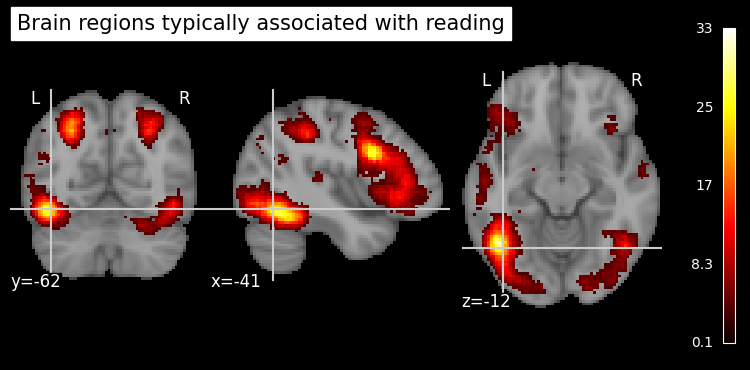

In [2]:
import nilearn
from nilearn import plotting

nilearn.plotting.plot_stat_map(stat_map_img=file_functional, bg_img=file_anatomical, title='Brain regions typically associated with reading', cmap='hot', threshold=0.1, cut_coords=(-41,-62,-12), draw_cross=True)
plotting.show()

*The second part of the assignment:* creating a histogram<br>
The code in this cell allows us to plot a histogram of the values in the functional data file using *nibabel*.

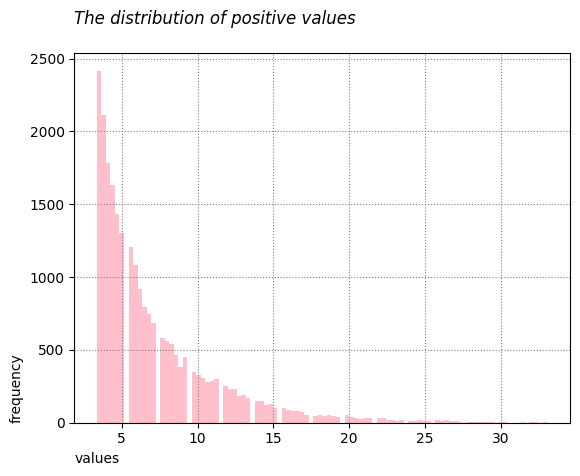

In [3]:
import nibabel as nib
import matplotlib.pyplot as plt

# loading the image into memory 
img = nib.load(file_functional)

# loading the image data as an array of floating point numbers
data = img.get_fdata()

# extracting the positive values
positive_values = data > 0

# creating a histogram
plt.hist(data[positive_values], bins=100, color='pink')

plt.title('The distribution of positive values \n', style='italic', loc='left') 
plt.grid(axis='both', color='grey', linestyle=":")
plt.ylabel('frequency', loc='bottom')
plt.xlabel('values', loc='left')
plt.show()